In the case of a wheel that rolls without slipping, a constrain equation exists that relates the $\theta$ coordinate to the x coordinate. However, such an equation does not exist in a wheel that slips. Can such a wheel be modelling using coupled Euler-Lagrange equations? If so, will the angular momentum and energy dissipation agree with what we would expect?

If this works, then the solution to the driven-damped problem becaomes trivial: choose a coordinate locating the position of the center of mass, and choose a coordinate describing rotations about the center of mass. Lagrange's equations yield 3 second order DE's in COM, and 3 first order DE's in the rotational coordinate. In general, the state will consist of 13 variables: 3 components of: position, velocity, and angular velocity; 4 components of a quaternion. 


$$T = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}mR^2\dot{\theta}^2, $$
$$V = 0 \newline$$

$$L = T - V = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}I\dot{\theta}^2$$

$$\frac{\partial{L}}{\partial{x}} = 0 \text{    and  } \frac{\partial{L}}{\partial{\dot{x}}} = m\dot{v}$$


$$\frac{d}{dt}(\frac{\partial{L}}{\partial{\dot{x}}}) - \frac{\partial{L}}{\partial{x}} = Q_x$$
$$Q_x = -f = -\mu N sign(v_{slip}) = -\mu mg * \text{sign}(v_{slip})$$
Plugging everything in, 
$$m\ddot{x} = -\mu m g$$
$$\ddot{x} = -\mu  g$$

Where sign(x) indicates the sign (+ or -) of x, and $v_{slip}$ is the velocity at the point of contact. The force of friction works against the velocity at the point of slippage. 

For $\theta$, 

$$\frac{\partial{L}}{\partial{\theta}} = 0 \text{    and  } \frac{\partial{L}}{\partial{\dot{\theta}}} = I\dot{\theta}$$
$$\frac{d}{dt}(\frac{\partial{L}}{\partial{\dot{\theta}}}) - \frac{\partial{L}}{\partial{\theta}} = Q_{\theta}$$
$$Q_{\theta} = -fR = -\mu mg R * \text{sign}(v_{slip}) $$
Plugging everything in, 
$$I\ddot{\theta} = -\mu m g R$$
$$\ddot{\theta} = -\mu \frac{mgR}{I}$$




In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%matplotlib inline



In [167]:
# the positive x is to the right
# theta is measured counter clockwise from the positive horizontal
def Sign(x):
    if x >= 0:
        return 1
    else:
        return -1
    
def ODE(t, state, mu, m, g, R, I):
    #[xdot, xddot, thetaDot, thetaDDot]
    xDot = state[1]
    xDDot = -mu*g * Sign(state[1] + R*state[3])
    thetaDot = state[3]
    thetaDDot = -mu*m*g*R* Sign(state[1] + R*state[3]) / I
    return [xDot, xDDot, thetaDot, thetaDDot]

x0 = 0
v0 = 0
theta0 = 0
omega0 = 30

state0 = [x0, v0, theta0, omega0]

T = 20
sampleSizePerSecond = 5

mu = 0.5
m = 1
g = 9.81
R = 1
I = 1 * m * R**2

#max_step = 1 step / x seconds
solution = integrate.solve_ivp(fun=ODE, t_span=(0, T ), y0=state0, args=(mu, m, g, R, I), max_step=1/sampleSizePerSecond)

timePoints = solution.t
sol = solution.y



time of minimal energy: 4.4s
velocity at this time: -14.998673928128326
angular velocity at this time: 15.001326071871688
Rw at this time: 15.001326071871688


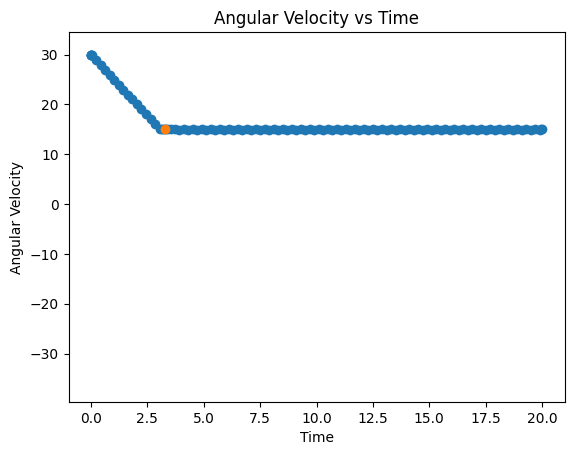

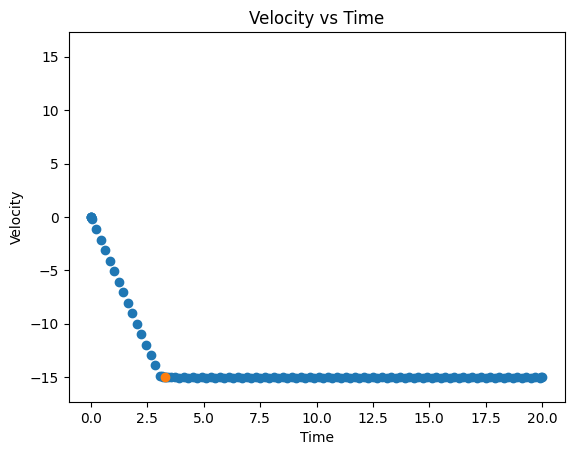

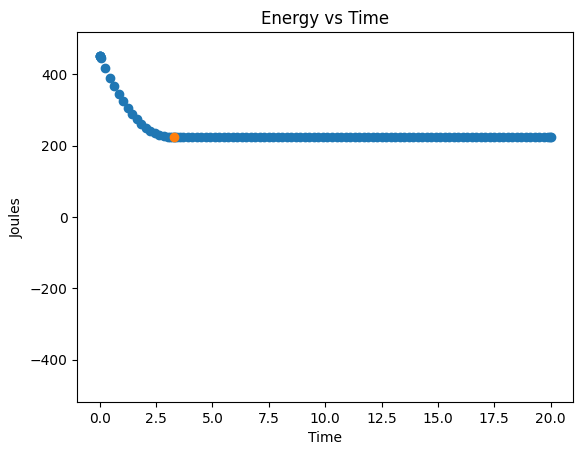

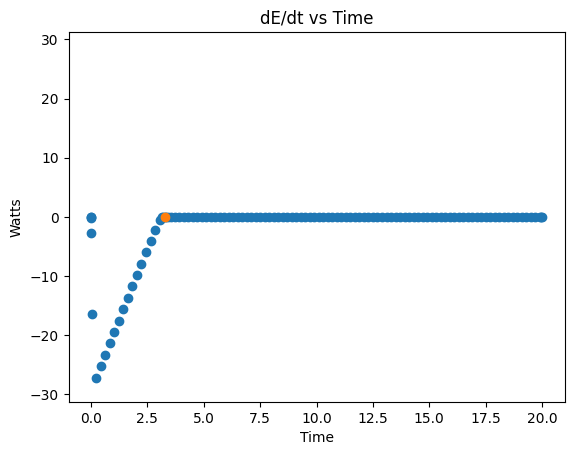

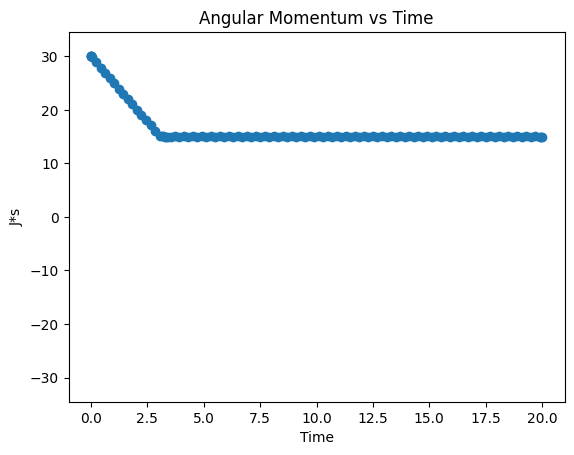

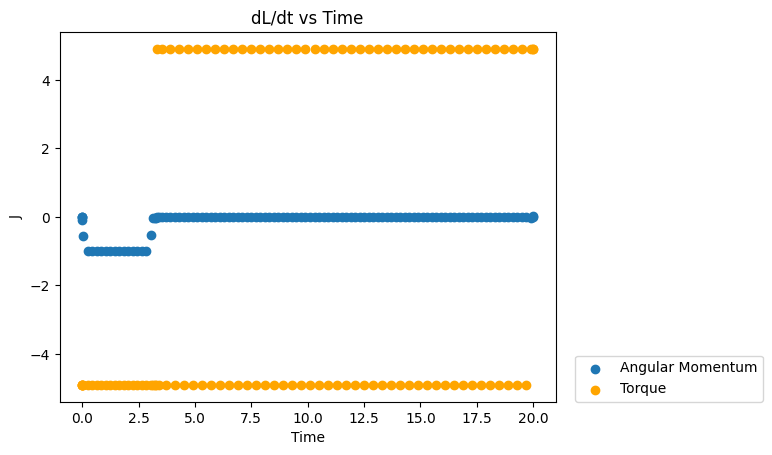

In [198]:
energy = .5*m*sol[1]**2 + .5*I*sol[3]**2
minEnergyIndex = np.where(energy == np.min(energy))[0][0]

plt.figure()
plt.title(f"Angular Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Angular Velocity")
plt.scatter(x= timePoints, y=sol[3])
plt.scatter(x=timePoints[minEnergyIndex], y=(sol[3][minEnergyIndex]))
plt.ylim(-1.15*np.max(np.absolute(sol[3])*1.15), 1.15*np.max(np.absolute(sol[3])))
#plt.show() 

plt.figure()
plt.title(f"Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.scatter(x= timePoints, y=sol[1])
plt.scatter(x=timePoints[minEnergyIndex], y=sol[1][minEnergyIndex])
plt.ylim(-1.15*np.max(np.absolute(sol[1])),1.15*np.max(np.absolute(sol[1])))
#plt.show() 

plt.figure()
plt.title(f"Energy vs Time")
plt.xlabel("Time")
plt.ylabel("Joules")
plt.scatter(x= timePoints, y=energy)
plt.scatter(x=timePoints[minEnergyIndex], y=energy[minEnergyIndex])
plt.ylim(-1.15*np.max(np.absolute(energy)),1.15*np.max(np.absolute(energy)))
#plt.show() 

plt.figure()
plt.title(f"dE/dt vs Time")
plt.xlabel("Time")
plt.ylabel("Watts")
plt.scatter(x= timePoints, y=np.gradient(energy))
plt.scatter(x=timePoints[minEnergyIndex], y=np.gradient(energy)[minEnergyIndex])
plt.ylim(-1.15*np.max(np.absolute(np.gradient(energy))),1.15*np.max(np.absolute(np.gradient(energy))))
#plt.show() 

plt.figure()
plt.title(f"Angular Momentum vs Time")
plt.xlabel("Time")
plt.ylabel("J*s")
plt.scatter(x= timePoints, y=I * sol[3])
plt.ylim(-1.15*np.max(np.absolute(I * sol[3])),1.15*np.max(np.absolute(I * sol[3])))
#plt.show() 

plt.figure()
plt.title(f"dL/dt vs Time")
plt.xlabel("Time")
plt.ylabel("J")
plt.scatter(x= timePoints, y=I * np.gradient(sol[3]),  label='Angular Momentum')
for i in range(len(timePoints)-1):
    plt.scatter(timePoints[i], -mu*m*g*R* np.sign(sol[1][i] + R*sol[3][i]), c='orange')
i = len(timePoints)-1
plt.scatter(timePoints[i], -mu*m*g*R* np.sign(sol[1][i] + R*sol[3][i]), c='orange', label='Torque')
plt.legend(loc=(1.04, 0))
#plt.show() 

minEnergyIndex = minEnergyIndex
print(f'time of minimal energy: {minEnergyIndex/sampleSizePerSecond}s')
print(f'velocity at this time: {sol[1][minEnergyIndex]}')
print(f'angular velocity at this time: {sol[3][minEnergyIndex]}')
print(f'Rw at this time: {R * sol[3][minEnergyIndex]}')

<h1>Analysis</h1>

Use solve_ivp, not odeint. 

It can handle when degrees of freedom are reduced. 

$v$ and $\omega$ each evolve due to the torque, which technically is a function of both variables (sign). 

The same case will be present in the Euler-Lagrange equations of the satellite. The rotational and orbital case will be coupled through the generalized forces. 

Using solve_ivp and plt, we may find regions where the degrees of freedom are reduced. Studying these may reveal an equation of constraint that can be used with the conservation of angular momentum to cheaply study behaviors where the spin of the satellite is not neglected. 

The abnormalities in the torque occur because the angular velocity never technically stabilizes. The velocity and angular velocity oscillate about the equillibrium point, and $v_{slip}$ changes in sign rapidly. The torque exerted at each of these points is constant. $\frac{dL}{dt}$ looks constant, but with enough zoom, would appear as a triangular wave. 